# Homework 2

## Pair Programming Group Number: 22
## Members of Team: Abe Mankavil

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [1]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/yanyanzheng96/8fe13cc4b7c6a1391d4841018340a627/raw/f17479a580783a810cfe119186e63b5b28a87b4c/melb_data.csv'
df = pd.read_csv(url)
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function of that vector using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

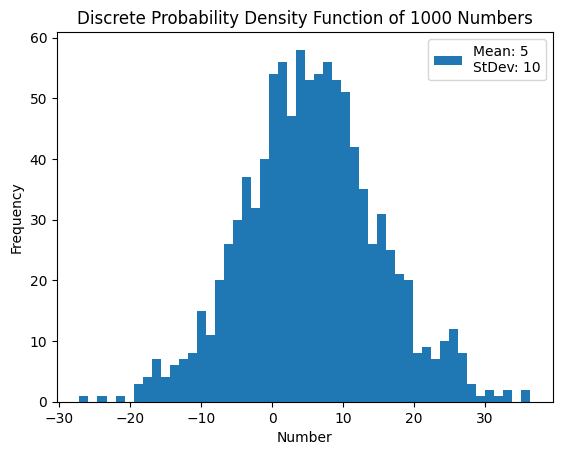

In [2]:
vec = np.random.normal(5,10, size=1000)
plt.hist(vec, bins=50)
plt.xlabel('Number');
plt.ylabel('Frequency');
plt.title('Discrete Probability Density Function of 1000 Numbers')
plt.legend(['Mean: 5\nStDev: 10']);

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph.
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  You can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to draw the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. You may use the [quantile function](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html?highlight=quantile#numpy.quantile) although it isn't strictly necessary to get the correct answer. 

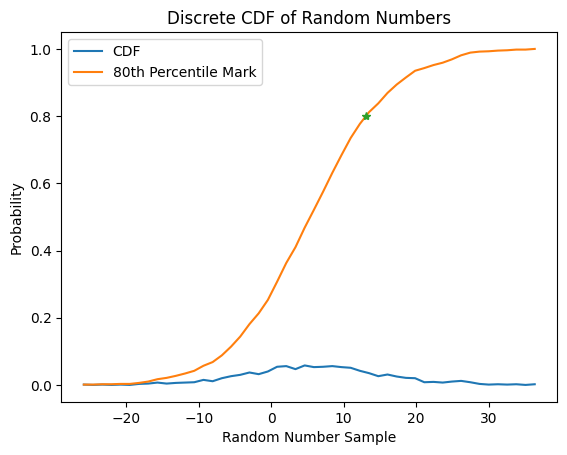

In [9]:
x = np.quantile(vec,0.8)


hist, bin_count = np.histogram(vec,bins=50)
pdf = hist/np.sum(hist)
cdf = np.cumsum(pdf)

plt.plot(bin_count[1:],pdf)
plt.plot(bin_count[1:],cdf);
plt.plot(x,0.8, marker='*');
plt.ylabel('Probability');
plt.title('Discrete CDF of Random Numbers')
plt.xlabel('Random Number Sample')
plt.legend(['CDF','80th Percentile Mark']);

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

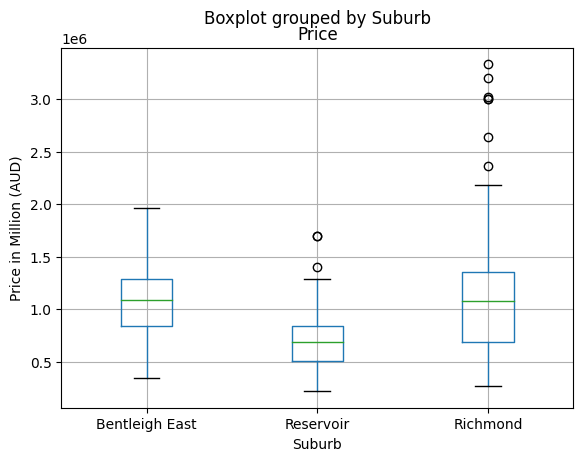

In [4]:
#suburbs = df[(df['Suburb'] == 'Reservoir') | (df['Suburb'] == 'Richmond') | (df['Suburb'] == 'Bentleigh East')]
suburbs = df.loc[df['Suburb'].isin(['Richmond','Reservoir','Bentleigh East'])]
suburbs.boxplot(column='Price', by='Suburb').set_ylabel('Price in Million (AUD)')
plt.show()

## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

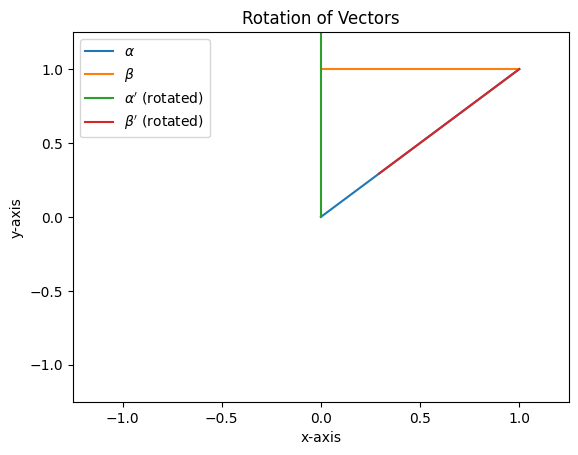

In [5]:
def plot_vec(vec):
    plt.plot(vec[:,0], vec[:,1])


def rotate(vec, theta):
    rot_matrix = np.array([[np.cos(theta), -1*np.sin(theta)],
                          [np.sin(theta), np.cos(theta)]])
    origin_vec = np.array([vec[1][0]-vec[0][0], vec[1][1]-vec[0][1]])
    rotated = [np.matmul(rot_matrix, origin_vec)]
    rotated += vec[0]
    rotated = np.insert(rotated, 0, vec[0], axis=0)
    return rotated


alpha = np.array([[0,0],[1,1]])
beta = np.array([[1,1],[0,1]])

plot_vec(alpha)
plot_vec(beta)

alpha_prime = rotate(alpha, np.pi/4)
plot_vec(alpha_prime)
beta_prime = rotate(beta, np.pi/4)
plot_vec(beta_prime)

plt.legend([r'$\alpha$',r'$\beta$',r'$\alpha^{\prime}$ (rotated)',r'$\beta^{\prime}$ (rotated)']);
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25);
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Rotation of Vectors');

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [6]:
A = np.array([[2,1,1],
            [4,-6,0],
            [-2,7,2]])
b = np.array([5,-2,9])

x = np.matmul(np.linalg.inv(A),b)
print(f"X = (x, y, z) = ({x[0]}, {x[1]}, {x[2]})")

X = (x, y, z) = (1.0, 1.0, 2.0)
